Please **submit this Jupyter notebook through Canvas** no later than **Monday November 12, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Rebecca de Feijter (10639918)

Tessa Ridderikhoff (10759697)

-----
# Exercise 1

## (a)
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

$\alpha = -3/2$ or $\alpha = 2$, because for those value of $\alpha$ the det(A) = 0, meaning the matrix is singular. 

## (b)
Consider the following linear system of equations:
$$
\begin{align*}
2x + y + z & = 3 \\
2x - y + 3z &= 5 \\
-2x + \alpha y + 3z &= 1.
\end{align*}
$$
For what values of $\alpha$ does this system have an infinite number of solutions?

The linear system has an infinite number of solutions when the x, y and z can be expressed as a function of z. With $\alpha = -5$, the solution set becomes (1-z, 1+z, z), so an infinite number of solutions is possible for any real value of z.  

## (c)
Denote the columns of an $n \times n$ matrix $A$ as $A_k$ for $k=1,\ldots,n$. We define the function $||A||_* = \max_k ||A_k||_2$. Show that $||A||_*$ is a norm, in that it satisfies the first three properties of a matrix norm (cf. §2.3.2).

The first three properties:
1. $||A|| > 0$ if $A \neq 0$

If $A \neq 0$, that means that at least one value in A is a nonzero value. This means that when for the column of that value the 2-norm is calculated, this value is absolute and squared, and therefore also positive. Thus, the maximum value among all columns is always larger than 0.

2. $||\gamma A|| = |\gamma|$ x $||A||$ for any scalar $\gamma$.

When applying a scalar $\gamma$ to matrix A, all values in A are multiplied by $\gamma$. Since this influences the size of values (the norm) in a matrix, the same effect is achieved when multiplying the norm of A by the absolute value of that scalar afterwards.

Because $\gamma$ is multiplied by the 2-norm of A as an absolute, the result corresponds with the 2-norm of $\gamma A$, since here the absolute of all values is taken as well. 

3. $||A + B|| \le ||A|| + ||B||$

When adding matrix A to matrix B, the $||A||_{*}$ returns the maximum 2-norm of all columns. However, when adding the norms of A and B afterwards, the maximum 2-norm of matrix A is added to the maximum 2-norm of matrix B, and therefore this is always bigger. Only if either $||A||_{*}$ or $||B||_{*}$ is 0, $||A + B|| = ||A|| + ||B||$.

<font color=red>Your argument for the third one is not valid -- what happens when $B = A$? Isn't $||A + B||_* = ||A||_* + ||B||_*$ then?

I was looking for something along the lines of
$$ ||A + B||_* = \max_k ||A_k + B_k||_2 \leq \max_k (||A_k||_2 + ||B_k||_2) \leq \max_k ||A_k||_2 + \max_k ||B_k||_2 = ||A||_* + ||B||_2.$$
Minus 1/2 point.</font>

----
# Exercise 2
For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

## (a)
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

In [5]:
import scipy
from scipy import linalg
import numpy as np

def getInverse(A):
    
    # get LU factorisation of matrix A
    lu, piv = scipy.linalg.lu_factor(A)
    
    # define identity matrix
    I = np.identity(len(A[0]))
    
    # calculate inverse using L, U and the identity matrix
    inv = scipy.linalg.lu_solve((lu, piv), I)
    return inv
    
# example matrix
print(getInverse(([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])))

[[-0.08247423  0.18556701  0.24742268 -0.29896907]
 [-0.26804124 -0.89690722 -0.19587629  1.27835052]
 [ 0.26804124  0.39690722  0.19587629 -0.77835052]
 [ 0.05154639  0.13402062 -0.15463918  0.06185567]]


## (b)
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?

LU decomposition is $O(n^{3})$, determining the inverse of a triangular matrix can be computed in $O(n^{2})$. So the total computational complexity is $O(n^{3} + n^{2})$.

## (c)
Apply your Python code to compute the inverse of the Hilbert matrix $H_n$ for $n=1, \ldots, 12$ (see https://en.wikipedia.org/wiki/Hilbert_matrix) -- you can use `scipy.linalg.hilbert`. This matrix is _very_ ill-conditioned, so computing its inverse is very hard for large $n$.

Compare the inverse with the "true" inverse given by `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing how the $\infty$-norm of their difference progresses for $n$.

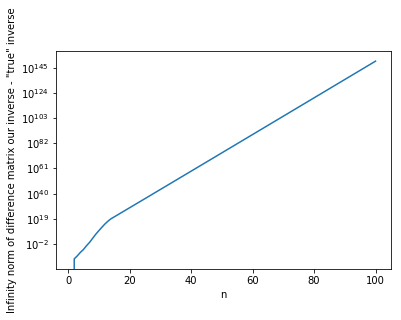

In [6]:
import matplotlib.pyplot as plt
from scipy.linalg import hilbert, invhilbert

n = 1
ns = []
norms = []

for i in list(range(0, 100)):
    
    # create Hilbert matrix of size n
    A = hilbert(n)
    
    # calculate different inverses
    ourinv = getInverse(A)
    hilbertinv = invhilbert(n)
    
    # calculate difference between inverse matrices
    difference = abs(ourinv - hilbertinv)
    
    # calculate infinity-norm of difference matrix
    differencenorm = np.linalg.norm(difference, ord=np.inf)
    
    ns.append(n)
    norms.append(differencenorm)
    n += 1

fig, ax = plt.subplots()
ax.semilogy(ns, norms)
ax.set_xlabel("n")
ax.set_ylabel("Infinity norm of difference matrix our inverse - \"true\" inverse")
plt.show()

## (d)
It is known that the $2$-condition number $cond_2(H_n)$ of the Hilbert matrix grows like $\mathcal O\left(\frac{(1+\sqrt{2})^{4n}}{\sqrt{n}}\right)$. Does the $\infty$-condition number (defined in Example 2.5) of $H_n$ grow in a similar way?
For the matrix inverse, try both your own matrix inversion routine, and `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing your results.

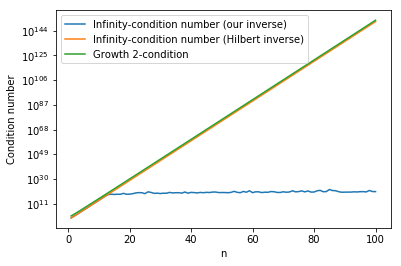

In [8]:
import math

n = 1
ns = []
ourconds = []
hilbertconds = []
expectedgrowth = []

for i in list(range(0, 100)):
    
    # create Hilbert matrix of size n
    A = hilbert(n)
    
    # calculate different inverses
    ourinv = getInverse(A)
    hilbertinv = invhilbert(n)
    
    # calculate norms
    matrixnorm = np.linalg.norm(A, ord=np.inf)
    ournorm = np.linalg.norm(ourinv, ord=np.inf)
    hilbertnorm = np.linalg.norm(hilbertinv, ord=np.inf)
    
    ns.append(n)
    
    # calculate infinity-condition numbers for both inverses
    ourcond = matrixnorm * ournorm
    ourconds.append(ourcond)
    
    hilbertcond = matrixnorm * hilbertnorm
    hilbertconds.append(hilbertcond)
    
    # define expected growth for 2-condition number
    growth2cond = (((1 + math.sqrt(2))**(4 * n))/math.sqrt(n))
    expectedgrowth.append(growth2cond)

    n += 1
    
fig, ax = plt.subplots()
ax.semilogy(ns, ourconds, label = "Infinity-condition number (our inverse)")
ax.semilogy(ns, hilbertconds, label = "Infinity-condition number (Hilbert inverse)")
ax.semilogy(ns, expectedgrowth, label = "Growth 2-condition")
ax.set_xlabel("n")
ax.set_ylabel("Condition number")
ax.legend(fontsize = "medium")
plt.show()

<font color=red>(a)--(c) look good. For the last one, your computation of `growth2cond` was wrong (missing some brackets resulting in a much lower number). I changed it, and now it looks better. I would have liked to see some kind of analysis as well of why our method breaks down for $n>12$. Minus 1/2 points.</font>